# FITS2TIFF: conversion and display of RGB FITS files

Converts a 3-extension RGB FITS file to TIFF and displays it.

In [1]:
import os

import numpy as np
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.convolution import convolve, convolve_fft, Gaussian2DKernel
from astropy.visualization import make_lupton_rgb

from datapath import DATA

In [2]:
data_dirpath = os.path.join(DATA,'astrophotography_data/Andromeda_2022/105MSDCF')

image_name = os.path.join(data_dirpath, 'drizzle.fits')

In [3]:
f = fits.open(image_name)
data_R = f[1].data
data_G = f[2].data
data_B = f[3].data
f.close()

In [4]:
# attempt at fixing the apparent mismatch between PSFs 
# kernel = Gaussian2DKernel(x_stddev=0.3)
# data_B = convolve(data_B, kernel)

In [5]:
rgb_image = make_lupton_rgb(data_R * 1.7, data_G, data_B * 1.5, Q=0.00001, stretch=170., minimum=-20.)

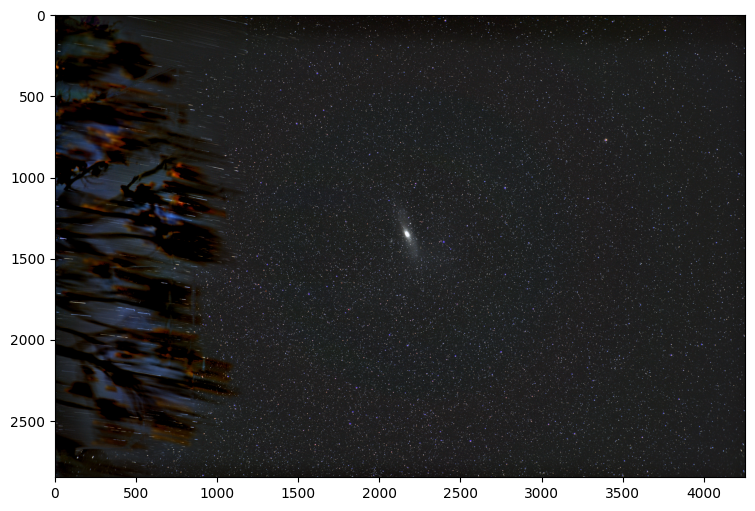

In [6]:
x0 = 0
x1 = rgb_image.shape[1]
y0 = 0
y1 = rgb_image.shape[0]

# x0 = 2000
# x1 = 2500
# y0 = 1100
# y1 = 1600

aslice = np.index_exp[y0:y1, x0:x1]

fig = plt.figure(figsize=[12, 6])
ax = fig.add_subplot(1, 1, 1)
plt.imshow(rgb_image[aslice])

In [7]:
plt.imsave("drizzle_converted.tiff", rgb_image)